In [1]:
import requests   # BILI是哔哩哔哩公司的股票代码
stock_code = "BILI"   # 构造完整的获取股票历史信息的网页URL
url = 'https://finance.yahoo.com/quote/%s/history?p=%s' % (stock_code, stock_code)    # 获取上述URL对应的网页
r = requests.get(url)
print(r)

<Response [200]>


In [2]:
import re   # 定义正则表达式，找到所有我们需要的股票历史数据
result = re.findall('"HistoricalPriceStore":{"prices":(.*?),"isPending"', r.text)    # 如果没有找到数据，prices就是None
if result is not None:
    print(result)

['[{"date":1610721000,"open":125.47000122070312,"high":126.70999908447266,"low":120,"close":122.62999725341797,"volume":4512800,"adjclose":122.62999725341797},{"date":1610634600,"open":121.84500122070312,"high":129.39999389648438,"low":121.30999755859375,"close":123.22000122070312,"volume":8002000,"adjclose":123.22000122070312},{"date":1610548200,"open":115.23999786376953,"high":120.93000030517578,"low":113.23400115966797,"close":119.30999755859375,"volume":3608600,"adjclose":119.30999755859375},{"date":1610461800,"open":118.26000213623047,"high":119.98999786376953,"low":113.5999984741211,"close":115.44000244140625,"volume":3335900,"adjclose":115.44000244140625},{"date":1610375400,"open":114.38999938964844,"high":116.83000183105469,"low":111.19999694824219,"close":112.47000122070312,"volume":7728500,"adjclose":112.47000122070312},{"date":1610116200,"open":114.73999786376953,"high":120.80000305175781,"low":113.9800033569336,"close":118.47000122070312,"volume":9460800,"adjclose":118.4700

In [3]:
# 把需要的股票价格从查找的结果中提取出来
prices = eval(result[0])
prices[1]

{'date': 1610634600,
 'open': 121.84500122070312,
 'high': 129.39999389648438,
 'low': 121.30999755859375,
 'close': 123.22000122070312,
 'volume': 8002000,
 'adjclose': 123.22000122070312}

In [4]:
# 通过肉眼观察，我们可以看到上述结果中有一些比较奇怪的数据，需要进行数据清洗
quotes = [item for item in prices if not 'type' in item]
quotes[1]

{'date': 1610634600,
 'open': 121.84500122070312,
 'high': 129.39999389648438,
 'low': 121.30999755859375,
 'close': 123.22000122070312,
 'volume': 8002000,
 'adjclose': 123.22000122070312}

In [5]:
from datetime import date   # 同时，需要将数据中date字段中的时间戳转换成更加直观的日期格式
list1 = []
for i in range(len(quotes)):
    x = date.fromtimestamp(quotes[i]['date'])
    y = date.strftime(x,'%Y-%m-%d')
    list1.append(y)
list1[1]

'2021-01-14'

In [6]:
import pandas as pd   # 使用pandas模块提供的DataFrame对象存储股票数据，并将刚才的日期作为索引列的值
quotesdf_ori = pd.DataFrame(quotes, index = list1)
quotesdf_ori

,date,open,high,low,close,volume,adjclose
2021-01-15,1610721000,125.470001,126.709999,120.000000,122.629997,4512800,122.629997
2021-01-14,1610634600,121.845001,129.399994,121.309998,123.220001,8002000,123.220001
2021-01-13,1610548200,115.239998,120.930000,113.234001,119.309998,3608600,119.309998
2021-01-12,1610461800,118.260002,119.989998,113.599998,115.440002,3335900,115.440002
2021-01-11,1610375400,114.389999,116.830002,111.199997,112.470001,7728500,112.470001
...,...,...,...,...,...,...,...
2020-01-23,1579789800,22.000000,22.660000,21.750000,22.510000,3872300,22.510000
2020-01-22,1579703400,22.799999,23.059999,22.530001,22.540001,4416400,22.540001
2020-01-21,1579617000,22.510000,23.250000,22.139999,22.610001,6813700,22.610001
2020-01-17,1579271400,23.110001,23.160000,22.410000,22.799999,6592500,22.799999


In [7]:
import time   # 去掉原始数据中的时间戳数据，并按照月份进行分组
quotesdf = quotesdf_ori.drop(['date'], axis = 1)  # axis=1表示从某列中删除，axis=0表示从某行中删除
templist = []
for i in range(len(quotesdf)):
    temp = time.strptime(quotesdf.index[i],"%Y-%m-%d")   # strptime()函数根据指定的格式把一个时间字符串解析为时间对象
    templist.append("{}/{:02}".format(temp.tm_year%100,temp.tm_mon))   # "{:02}"表示将月份改成2位且带前导0的格式
tempdf = quotesdf.copy()
tempdf['month'] = templist
tempdf

,open,high,low,close,volume,adjclose,month
2021-01-15,125.470001,126.709999,120.000000,122.629997,4512800,122.629997,21/01
2021-01-14,121.845001,129.399994,121.309998,123.220001,8002000,123.220001,21/01
2021-01-13,115.239998,120.930000,113.234001,119.309998,3608600,119.309998,21/01
2021-01-12,118.260002,119.989998,113.599998,115.440002,3335900,115.440002,21/01
2021-01-11,114.389999,116.830002,111.199997,112.470001,7728500,112.470001,21/01
...,...,...,...,...,...,...,...
2020-01-23,22.000000,22.660000,21.750000,22.510000,3872300,22.510000,20/01
2020-01-22,22.799999,23.059999,22.530001,22.540001,4416400,22.540001,20/01
2020-01-21,22.510000,23.250000,22.139999,22.610001,6813700,22.610001,20/01
2020-01-17,23.110001,23.160000,22.410000,22.799999,6592500,22.799999,20/01


In [8]:
# 通过对月份数据进行分组操作，求出苹果公司近一年来，每个月的平均收盘价
avgPrices = tempdf.groupby('month').close.mean()
avgPrices

month
20/01     22.286363
20/02     26.336316
20/03     23.871818
20/04     27.202857
20/05     30.623500
20/06     39.181818
20/07     43.812727
20/08     44.483333
20/09     44.290476
20/10     45.340454
20/11     52.160500
20/12     77.636364
21/01    112.574000
Name: close, dtype: float64

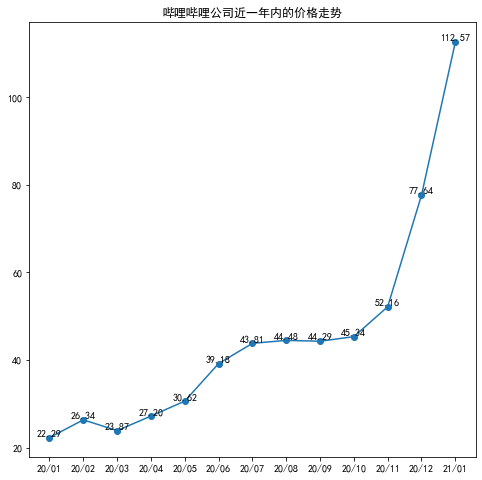

In [9]:
import matplotlib.pyplot as plt    # 将上述数据表示成折线图
x = list(avgPrices.index)
y = avgPrices.values
plt.figure(figsize=(8,8))
plt.plot(x, y,"-o")
# 在图表中加入中文标题的问题
# from matplotlib.font_manager import FontProperties
# myfont = FontProperties(fname=r"//System//Library//Fonts//STHeiti Medium.ttc", size=16)
# plt.title("哔哩哔哩公司近一年内的价格走势")
# # 为每一个点加上数据标签
plt.rcParams['font.sans-serif']=['SimHei']   #用来正常显示中文标签
plt.title('哔哩哔哩公司近一年内的价格走势')
for a,b in zip(x,y):
    plt.text(a,b,"%.2f"%b,ha='center',va='bottom')
plt.show()